In [96]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Dataset

Real estate agent table:

|Area|Distance|Price|
|---|---|---|
|70|3|21200|
|50|1|22010|
|120|9|24305|
|100|2|31500|

In [97]:
def generate_data(nums=1000):
    w = np.array([1.0, -3.0])
    b = 1.0
    x = np.random.randn(nums, 2)
    y = np.dot(x,w) + b + np.random.randn()
    y = np.reshape(y, (nums, 1))
    return x, y

In [98]:
x, y = generate_data()

In [99]:
print(x.shape, y.shape)

(1000, 2) (1000, 1)


In [100]:
print(x[0], y[0])

[0.45370882 0.08632012] [-1.8702353]


# Initializing Parameters

In [101]:
class Model:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()

In [102]:
model = Model(2)
print(model.W)
print(model.b)

[[-0.44877535]
 [-0.65911158]]
1.735215144509013


# Forward Pass

In [103]:
class Model(Model):
    def forward_pass(self, X):
        y_hat = self.b + np.dot(X, self.W)
        return y_hat

In [104]:
y_hat = Model(2).forward_pass(x)
print(x.shape)

(1000, 2)


# Computing Loss

In [105]:
class Model(Model):
    def compute_loss(self, y_hat, y):
        return np.sum(((y-y_hat)**2)/(2*y_hat.shape[0]))

In [106]:
model = Model(2)
y_hat = model.forward_pass(x)
loss = model.compute_loss(y_hat, y)

In [107]:
loss

10.795075562459363

# Backward Pass

In [108]:
class Model(Model):
    def backward_pass(self, X, y_true, y_hat):
        m = y_true.shape[0]
        db = (1/m)*np.sum((y_hat-y_true))
        dw = (1/m)*np.sum(np.dot(np.transpose(y_hat-y_true), X), axis = 0)
        return dw, db

In [109]:
model = Model(2)
X, y = generate_data()
y_hat = model.forward_pass(X)

dw, db = model.backward_pass(X, y, y_hat)

In [110]:
print(dw, db)

[-2.02337111  2.07106971] -0.6805221332338722


# Updating Parameters

In [111]:
class Model(Model):
    def update_param(self, lr, dw, db):
        self.W = self.W - lr*np.reshape(dw, (self.num_features, 1))
        self.b = self.b - lr*db

# Task 8: Training Loop

In [112]:
class Model(Model):
    def train_data(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range(iterations):
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat, y_train)
            dw, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_param(lr, dw, db)
            losses.append(loss)
            if i%int(iterations/10) == 0:
                print(f"Iteration: {i}, Loss: {loss}")
        return losses

In [113]:
model = Model(2)

In [114]:
x_train, y_train = generate_data()

In [117]:
losses = model.train_data(x_train, y_train, 1000, 3e-2)

Iteration: 0, Loss: 0.01851050375186873
Iteration: 100, Loss: 4.168692521727507e-05
Iteration: 200, Loss: 9.424550396781693e-08
Iteration: 300, Loss: 2.1377089273568231e-10
Iteration: 400, Loss: 4.862311431910993e-13
Iteration: 500, Loss: 1.1085424276340437e-15
Iteration: 600, Loss: 2.5322932643766185e-18
Iteration: 700, Loss: 5.7941346613313706e-21
Iteration: 800, Loss: 1.327647314026154e-23
Iteration: 900, Loss: 3.0443383155215976e-26


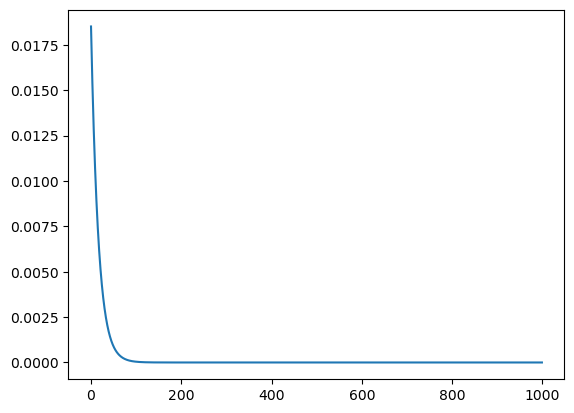

In [118]:
plt.plot(losses)

# Predictions

In [131]:
model_untrained = Model(2)
x_test, y_test = generate_data()

In [132]:
preds_untrained = model_untrained.forward_pass(x_test)
preds_trained = model.forward_pass(x_test)

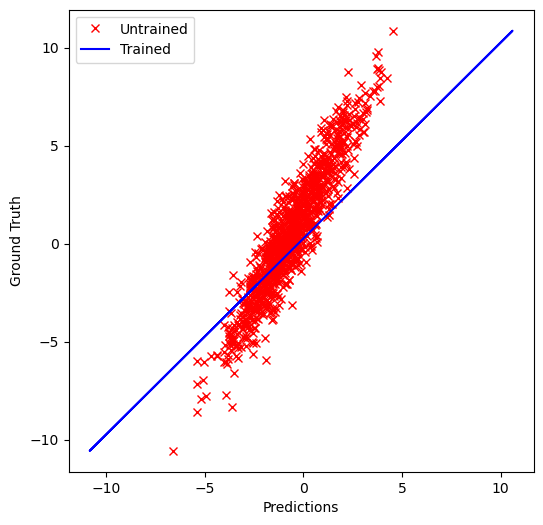

In [133]:
plt.figure(figsize=(6,6))
plt.plot(preds_untrained, y_test, 'rx', label = 'Untrained')
plt.plot(preds_trained, y_test, 'b', label = 'Trained')
plt.legend()
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.show()